In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from matplotlib import colors
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.mplot3d import Axes3D

In [4]:
# Load the dataset
data = pd.read_excel("marketing_campaign1.xlsx")

In [5]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [6]:
# Display the first few rows of the dataset
print("First five rows of the dataset:")
data.head()

First five rows of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
# Display dataset information
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts   

In [8]:
# Display summary statistics
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [9]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
# checking for missing values
missing_values = data.isna().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


## Handling Missing Values

In [12]:
# Removing rows with missing values in 'Income' column
data = data.dropna()
print("The total number of data points after removing missing values:", len(data))


The total number of data points after removing missing values: 2216


## Converting 'Dt_Customer' to DateTime Format


In [14]:
# Convert 'Dt_Customer' to DateTime format
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])


## Finding the Newest and Oldest Customer Dates

In [17]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


## Creating 'Customer_For' Feature

In [19]:
# Creating 'Customer_For' feature (number of days since joining)
data["Customer_For"] = (data["Dt_Customer"].max() - data["Dt_Customer"]).dt.days


In [20]:
data['Customer_For']

0       663
1       113
2       312
3       139
4       161
       ... 
2235    381
2236     19
2237    155
2238    156
2239    622
Name: Customer_For, Length: 2216, dtype: int64

In [21]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


## Enhanced Feature Engineering:

In [23]:
#  Age of Customer
data["Age"] = 2025 - data["Year_Birth"]


In [24]:
# dividing age into groups
data['Age_Group'] = pd.cut(x = data['Age'], bins = [17, 24, 44, 64, 150],
                         labels = ['Young adult','Adult','Middel Aged','Senior Citizen'])

In [25]:
# Total Amount Spent by Customer
data["Spent"] = data[["MntWines", "MntFruits", "MntMeatProducts",
                      "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].sum(axis=1)


In [27]:
#  Living Situation of Customer
data["Living_With"] = data["Marital_Status"].replace(
    {"Married": "Partner", "Together": "Partner", "Absurd": "Alone",
     "Widow": "Alone", "YOLO": "Alone", "Divorced": "Alone", "Single": "Alone"}
)


In [31]:
data['Living_With'].value_counts()

Living_With
Partner    1430
Alone       786
Name: count, dtype: int64

In [45]:
#  Total Number of Children
data["Children"] = data["Kidhome"] + data["Teenhome"]


In [47]:
#  Total Family Size
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner": 2}) + data["Children"]


In [48]:
data['Family_Size']

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2216, dtype: int64

In [50]:
# Parenthood Status
data["Is_Parent"] = (data["Children"] > 0).astype(int)


In [54]:
data['Is_Parent']

0       0
1       1
2       0
3       1
4       1
       ..
2235    1
2236    1
2237    0
2238    1
2239    1
Name: Is_Parent, Length: 2216, dtype: int32

In [56]:
#  Simplified Education Categories
data["Education"] = data["Education"].replace(
    {"Basic": "Undergraduate", "2n Cycle": "Undergraduate",
     "Graduation": "Graduate", "Master": "Postgraduate", "PhD": "PhD"}
)


In [58]:
#  Renaming Product Columns for Clarity
data = data.rename(columns={"MntWines": "Wines", "MntFruits": "Fruits",
                            "MntMeatProducts": "Meat", "MntFishProducts": "Fish",
                            "MntSweetProducts": "Sweets", "MntGoldProds": "Gold"})


We can now drop the original columns through which we have created the New Columns

Such as 'Kidhome', 'Teenhome' as we have created a new column using these two

In [61]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Age_Group', 'Spent', 'Living_With', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [63]:
# Dropping Redundant Columns
to_drop = ['Age',"Marital_Status", "Dt_Customer",'Kidhome', 'Teenhome', 'Response', 'Is_Parent',  "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data_clean = data.drop(columns=to_drop)


In [65]:
#Total Number of Purchases through any means

data_clean['Total_Purchase'] = data_clean[['NumWebPurchases', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis = 1)

In [67]:
#Create a column to show Customer accepted the offer in which campaign

def Offer(row):
    if row["AcceptedCmp1"] == 1:
        return 1
    elif row["AcceptedCmp2"] == 1:
        return 2
    elif row['AcceptedCmp3'] == 1:
        return 3
    elif row['AcceptedCmp4'] == 1:
        return 4
    else:
        return 5

In [69]:
data_clean = data_clean.assign(Offer_Accepted=data_clean.apply(Offer, axis=1))
data_clean

,Education,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,...,AcceptedCmp2,Complain,Customer_For,Age_Group,Spent,Living_With,Children,Family_Size,Total_Purchase,Offer_Accepted
0,Graduate,58138.0,58,635,88,546,172,88,88,3,...,0,0,663,Senior Citizen,1617,Alone,0,1,25,5
1,Graduate,46344.0,38,11,1,6,2,1,6,2,...,0,0,113,Senior Citizen,27,Alone,2,3,6,5
2,Graduate,71613.0,26,426,49,127,111,21,42,1,...,0,0,312,Middel Aged,776,Partner,0,2,21,5
3,Graduate,26646.0,26,11,4,20,10,3,5,2,...,0,0,139,Adult,53,Partner,1,3,8,5
4,PhD,58293.0,94,173,43,118,46,27,15,5,...,0,0,161,Adult,422,Partner,1,3,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,709,43,182,42,118,247,2,...,0,0,381,Middel Aged,1341,Partner,1,3,18,5
2236,PhD,64014.0,56,406,0,30,0,0,8,7,...,0,0,19,Senior Citizen,444,Partner,3,5,22,1
2237,Graduate,56981.0,91,908,48,217,32,12,24,1,...,0,0,155,Adult,1241,Alone,0,1,19,4
2238,Postgraduate,69245.0,8,428,30,214,80,30,61,2,...,0,0,156,Senior Citizen,843,Partner,1,3,23,5


In [71]:
data_clean.describe()


,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_For,Spent,Children,Family_Size,Total_Purchase,Offer_Accepted
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,...,0.073105,0.064079,0.013538,0.009477,353.521209,607.075361,0.947202,2.592509,14.880866,4.550542
std,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,...,0.260367,0.244950,0.115588,0.096907,202.434667,602.900476,0.749062,0.905722,7.670957,1.088487
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,1.000000
25%,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,69.000000,0.000000,2.000000,8.000000,5.000000
50%,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,355.500000,396.500000,1.000000,3.000000,15.000000,5.000000
75%,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,529.000000,1048.000000,1.000000,3.000000,21.000000,5.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,699.000000,2525.000000,3.000000,5.000000,44.000000,5.000000


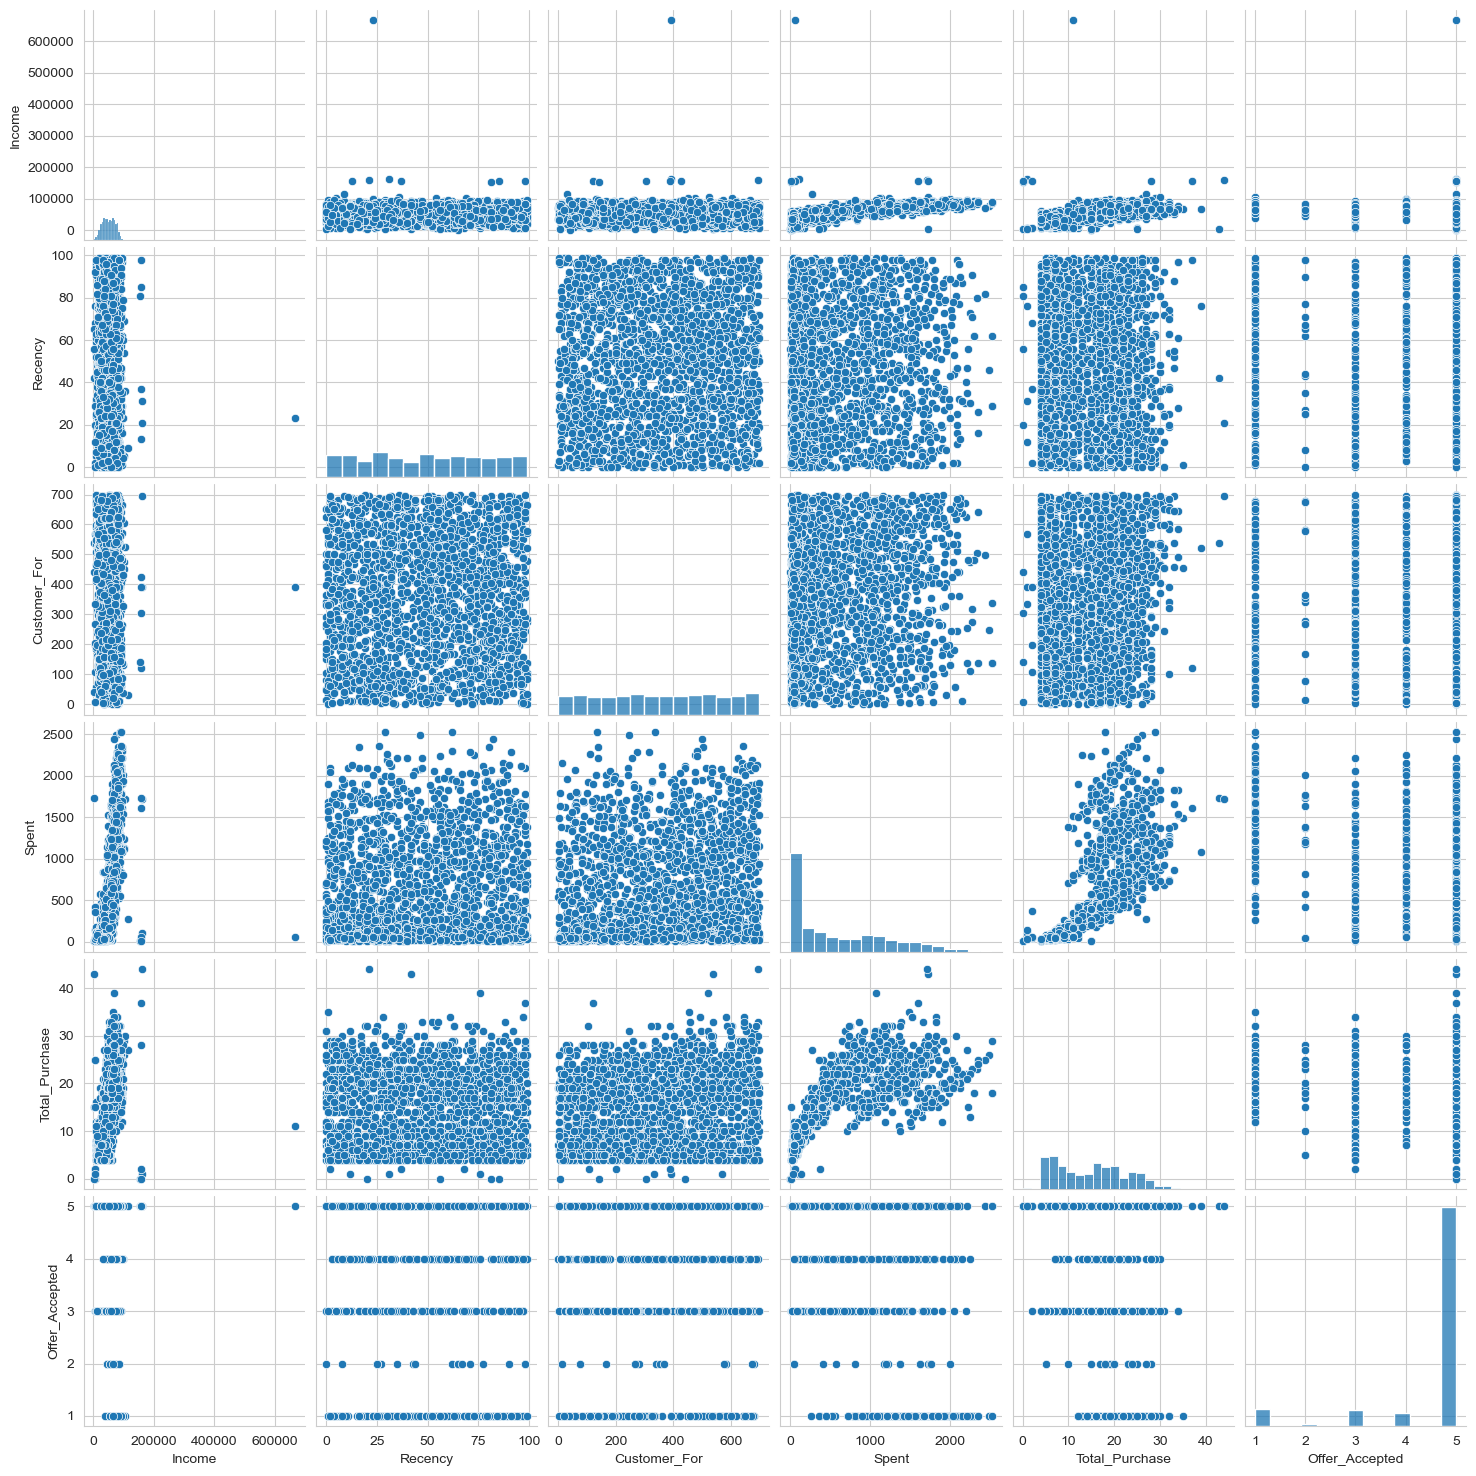

In [73]:
# Set background color
sns.set_style("whitegrid")

# Select features to plot
features_to_plot = ["Income", "Recency", "Customer_For", "Spent", 'Total_Purchase', 'Offer_Accepted']

# Create pair plot
sns.pairplot(data_clean[features_to_plot])

# Show plot
plt.show()

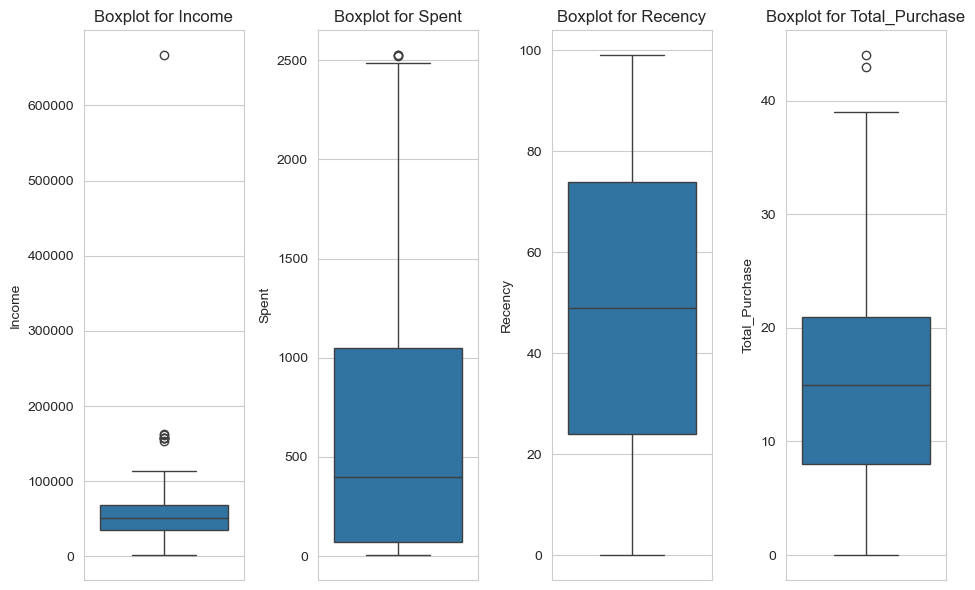

In [74]:
columns = ["Income", "Spent", "Recency", 'Total_Purchase']

plt.figure(figsize=(12, 6))

for i in range(len(columns)):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=data_clean[columns[i]])
    plt.title(f"Boxplot for {columns[i]}")

plt.tight_layout()
plt.show()

In [75]:
import numpy as np

Q1 = data_clean["Income"].quantile(0.25)
Q3 = data_clean["Income"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
data_clean = data_clean[(data_clean["Income"] >= lower_bound) & (data_clean["Income"] <= upper_bound)]
print("The total number of data-points after removing the outliers are:", len(data_clean))


The total number of data-points after removing the outliers are: 2208


In [76]:
#Removing Outliers for Total_Purchase Column

Q1_tp = data_clean['Total_Purchase'].quantile(0.25)
Q2_tp = data_clean['Total_Purchase'].quantile(0.75)
IQR_tp = Q2_tp - Q1_tp

lower_bound_tp = Q1_tp - 1.5*IQR_tp
Upper_bound_tp = Q2_tp + 1.5*IQR_tp

data_clean = data_clean[(data_clean['Total_Purchase'] >= lower_bound_tp) & (data_clean['Total_Purchase'] <= Upper_bound_tp)]

print("The total number of data-points after removing the outliers are:", len(data_clean))

The total number of data-points after removing the outliers are: 2207


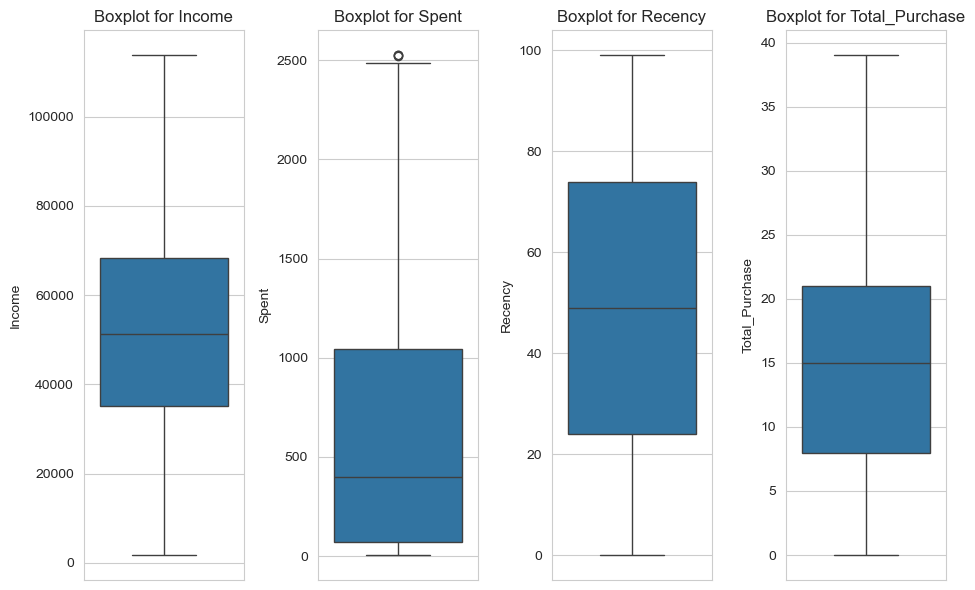

In [77]:
columns = ["Income", "Spent", "Recency", 'Total_Purchase']

plt.figure(figsize=(12, 6))

for i in range(len(columns)):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(y=data_clean[columns[i]])
    plt.title(f"Boxplot for {columns[i]}")

plt.tight_layout()
plt.show()

In [78]:
data.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wines                           int64
Fruits                          int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [79]:
cols = 'Age_Group'

data_clean[cols] = data_clean[cols].astype('object')

In [85]:
corr_matrix = pd.DataFrame(data_clean.select_dtypes(exclude=['object']))
corr_matrix

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Customer_For,Spent,Children,Family_Size,Total_Purchase,Offer_Accepted
0,58138.0,58,635,88,546,172,88,88,3,8,...,0,0,0,0,663,1617,0,1,25,5
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,0,0,0,113,27,2,3,6,5
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,0,0,0,312,776,0,2,21,5
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,0,0,0,139,53,1,3,8,5
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,0,0,0,161,422,1,3,19,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,46,709,43,182,42,118,247,2,9,...,0,0,0,0,381,1341,1,3,18,5
2236,64014.0,56,406,0,30,0,0,8,7,8,...,0,1,0,0,19,444,3,5,22,1
2237,56981.0,91,908,48,217,32,12,24,1,2,...,0,0,0,0,155,1241,0,1,19,4
2238,69245.0,8,428,30,214,80,30,61,2,6,...,0,0,0,0,156,843,1,3,23,5


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(data = corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            annot_kws={"size": 10, "color": "black"},
            center=0,
            cbar=True)

plt.show()


NameError: name 'corr' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:
data_clean.columns

#Drop the columns that are highly correlated to each other

In [80]:
data_clean = data_clean.drop(columns = ['Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Customer_For', 'Living_With',
       'Children', 'Offer_Accepted', 'Complain' ])

In [82]:
df = pd.DataFrame(data_clean.select_dtypes(exclude=['object']))

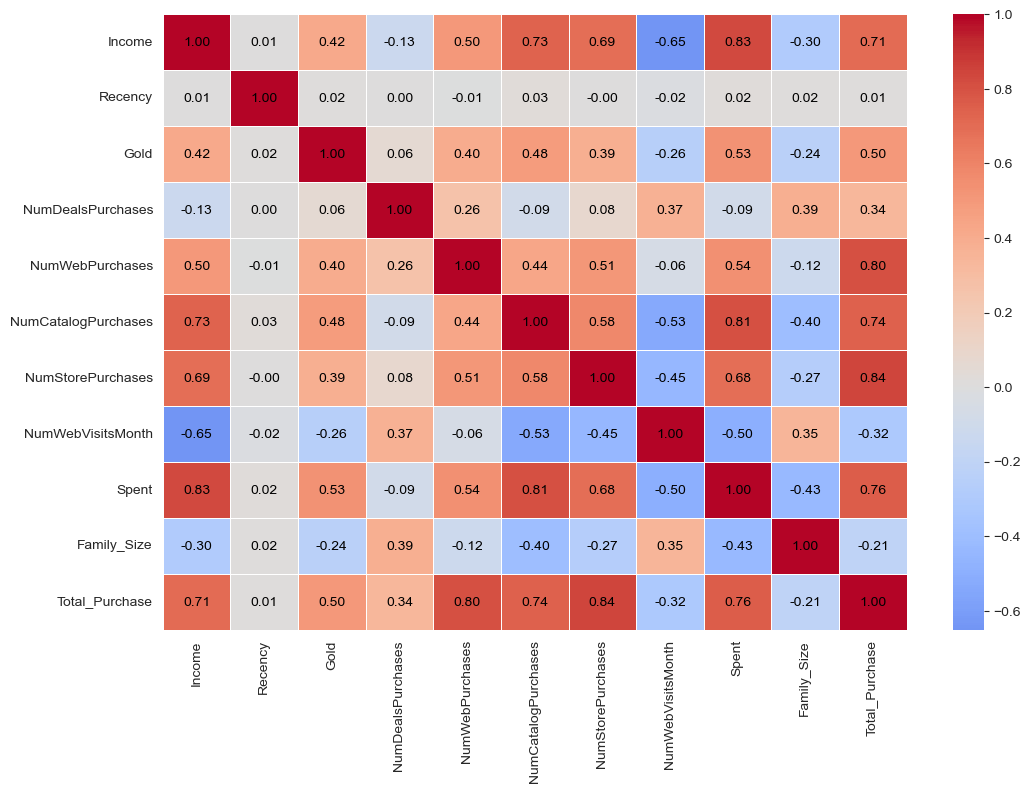

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(),
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.5,
            annot_kws={"size": 10, "color": "black"},
            center=0,
            cbar=True)

plt.show()


#Data Processing

Label encoding the categorical features
Scaling the features using the standard scaler
Creating a subset dataframe for dimensionality reduction

In [89]:
data_clean.dtypes

Education               object
Income                 float64
Recency                  int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age_Group               object
Spent                    int64
Family_Size              int64
Total_Purchase           int64
dtype: object

In [90]:
cols = 'Age_Group'

data_clean[cols] = data_clean[cols].astype('object')

In [93]:
#Get list of categorical variables
s = (data_clean.dtypes == 'object')
object_cols = list(s[s].index)


print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Age_Group']


In [97]:
new_df = data_clean.copy()

In [98]:
#Label Encoding the object dtypes.
data_labeled = pd.DataFrame()
LE = LabelEncoder()

for col in object_cols:
    data_clean[col] = LE.fit_transform(data_clean[col])

print("All categorical features are now numerical.")

All categorical features are now numerical.


In [105]:
data_clean

,Education,Income,Recency,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Group,Spent,Family_Size,Total_Purchase
0,0,58138.0,58,88,3,8,10,4,7,2,1617,1,25
1,0,46344.0,38,6,2,1,1,2,5,2,27,3,6
2,0,71613.0,26,42,1,8,2,10,4,1,776,2,21
3,0,26646.0,26,5,2,2,0,4,6,0,53,3,8
4,1,58293.0,94,15,5,5,3,6,5,0,422,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,247,2,9,3,4,5,1,1341,3,18
2236,1,64014.0,56,8,7,8,2,5,7,2,444,5,22
2237,0,56981.0,91,24,1,2,3,13,6,0,1241,1,19
2238,2,69245.0,8,61,2,6,5,10,3,2,843,3,23


In [107]:
#Scaling
scaler = StandardScaler()
scaler.fit(data_clean)
scaled_ds = pd.DataFrame(scaler.transform(data_clean),columns= data_clean.columns )
print("All features are now scaled")

All features are now scaled


In [109]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Recency,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Group,Spent,Family_Size,Total_Purchase
0,-0.843170,0.313342,0.310412,0.846185,0.369328,1.425737,2.682770,-0.562411,0.689779,1.354136,1.679866,-1.758283,1.334711
1,-0.843170,-0.256777,-0.380715,-0.735487,-0.166574,-1.133367,-0.594869,-1.179791,-0.139383,1.354136,-0.963019,0.449700,-1.167790
2,-0.843170,0.964721,-0.795391,-0.041094,-0.702476,1.425737,-0.230687,1.289728,-0.553965,-0.158302,0.281963,-0.654291,0.807869
3,-0.843170,-1.208975,-0.795391,-0.754775,-0.166574,-0.767781,-0.959051,-0.562411,0.275198,-1.670740,-0.919802,0.449700,-0.904369
4,0.102878,0.320835,1.554440,-0.561889,1.441133,0.328978,0.133495,0.054968,-0.139383,-1.670740,-0.306453,0.449700,0.544448


In [111]:
## Dimensionality Reduction (PCA)


In [113]:
#Initiating PCA to reduce dimensions aka features to 3
pca = PCA(n_components=5)
p_com = pca.fit_transform(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3", 'col4', 'col5']))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2207.0,6.438992e-18,2.286615,-5.156678,-2.246376,-0.181352,2.094315,5.824725
col2,2207.0,-5.151193e-17,1.360064,-2.684695,-0.986318,-0.175094,0.788663,6.831863
col3,2207.0,-1.448773e-17,1.031968,-4.462156,-0.697579,0.039322,0.680429,3.471886
col4,2207.0,-4.024370e-18,1.007642,-3.229023,-0.703838,0.023231,0.701897,2.762401
col5,2207.0,5.392656e-17,0.985294,-1.912873,-0.735302,-0.051397,0.601296,2.754908


In [115]:
pca.explained_variance_

array([5.22860777, 1.84977424, 1.06495807, 1.01534331, 0.97080356])

In [117]:
# in percentage - The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_

In [119]:
var

array([0.40201836, 0.14222585, 0.08188273, 0.07806794, 0.07464336])

In [121]:
import numpy as np
# Cumulative Variance
var1 = np.cumsum(np.round(var, decimals = 4)*100)
# if you stop upto 5 column you will get 77 %

In [123]:
var1

array([40.2 , 54.42, 62.61, 70.42, 77.88])

In [125]:
pca.components_

array([[-4.82248067e-02,  3.86486628e-01,  7.86781476e-03,
         2.66786668e-01, -5.97255879e-03,  2.90680077e-01,
         3.75970910e-01,  3.58879883e-01, -2.60899002e-01,
         7.82247058e-02,  3.98696803e-01, -1.87873244e-01,
         3.92355784e-01],
       [-3.08153938e-02, -9.15887911e-02,  6.90116620e-04,
         6.54108647e-02,  6.42211471e-01,  3.52013851e-01,
        -8.90417921e-02,  8.81095021e-02,  3.93529438e-01,
         1.51397478e-01, -6.54989274e-02,  4.10043508e-01,
         2.90050676e-01],
       [-3.05409173e-01,  1.43004817e-01,  3.90217470e-01,
        -1.65029848e-01, -7.04797221e-02, -1.48507651e-01,
         1.18090946e-02, -1.78232749e-02, -2.47221469e-01,
         7.23925906e-01, -5.35696554e-02,  2.92805125e-01,
        -7.41591209e-02],
       [-5.91413335e-01, -8.03503330e-02,  6.24146959e-01,
         1.80312538e-01,  1.62240296e-02,  3.74940216e-02,
         2.36503933e-03, -5.91831701e-02,  1.39250015e-01,
        -4.31096009e-01,  3.22262232e

In [127]:
scores_pca = pca.transform(scaled_ds)

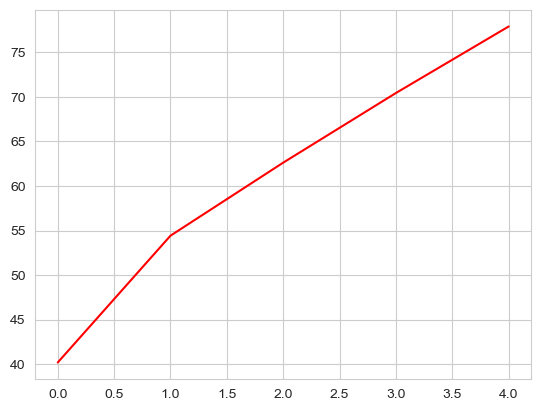

In [129]:
plt.plot(var1, color = 'red')

#**Model Building**

#K-means clustering with PCA

#Kmeans Algorithm

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

The way kmeans algorithm works is as follows:

Specify number of clusters K.

Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.

Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

Compute the sum of the squared distance between data points and all centroids.
Assign each data point to the closest cluster (centroid).

Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

In [134]:
#We fit K means using the transformed data from the PCA

wcss = []
for i in range(1, 21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

#The Elbow Curve

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

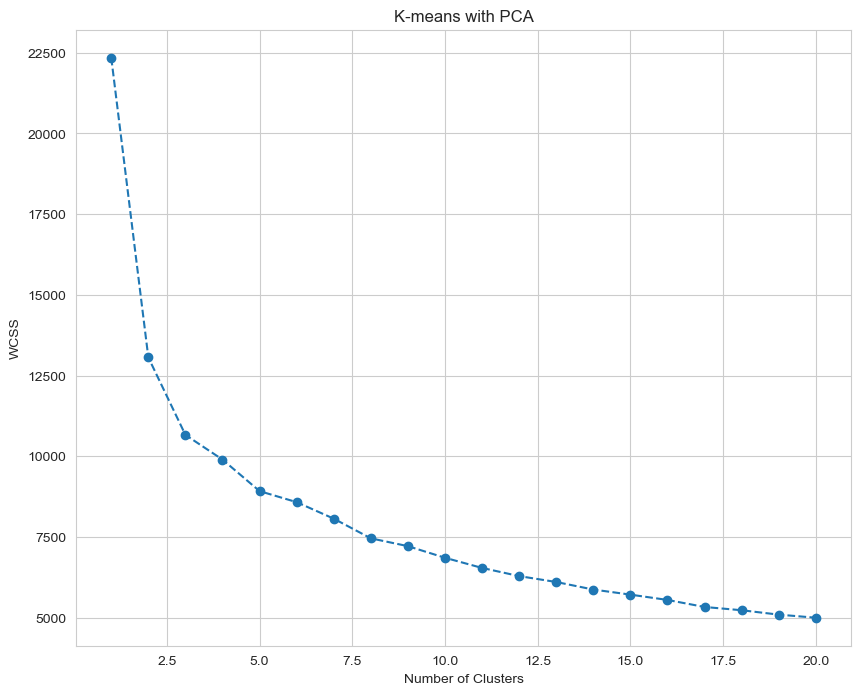

In [137]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA')
plt.show()

In [139]:
#We have choosen 2 Clusters, So we can run K-means using number of clusters equals 3
#Same initializer and random state as before

kmeans_pca = KMeans(n_clusters=2, init = 'k-means++', random_state=42)

In [141]:
#We fit our data with k-means pca model

kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

#Analyze the Results of K-means and PCA Clustering

In [144]:
# We create a new dataframe with the original features and add the PCA scores and Assign the Clusters

df_segm_pca_kmeans = pd.concat([data_clean.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-5:] = ['Component1', 'Component2', 'Component3', 'Component4', 'Component5']

#The last column we add contains the pca k-means clustering labels
new_df['segment'] = kmeans_pca.labels_

In [146]:
df_segm_pca_kmeans['segment'] = kmeans_pca.labels_

In [148]:
df_segm_pca_kmeans.head()

,Education,Income,Recency,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Group,Spent,Family_Size,Total_Purchase,Component1,Component2,Component3,Component4,Component5,segment
0,0,58138.0,58,88,3,8,10,4,7,2,1617,1,25,3.058728,0.536074,0.193707,0.653713,-0.263516,0
1,0,46344.0,38,6,2,1,1,2,5,2,27,3,6,-2.017639,-0.496874,1.672282,-0.499299,-1.030392,1
2,0,71613.0,26,42,1,8,2,10,4,1,776,2,21,1.875506,-0.175094,-0.340298,-0.056811,-1.120466,0
3,0,26646.0,26,5,2,2,0,4,6,0,53,3,8,-2.427345,-0.416929,-1.006244,0.652538,-1.168391,1
4,1,58293.0,94,15,5,5,3,6,5,0,422,3,19,0.050920,1.020627,-0.503389,1.456819,1.241812,1


#Silhouette Score

In [151]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_segm_pca_kmeans, kmeans_pca.labels_, metric='cosine')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.652


In [153]:
new_df.Total_Purchase.value_counts()

Total_Purchase
7     148
5     143
4     125
6     123
17    115
16    101
19    100
9     100
21     94
20     94
8      93
22     93
23     87
18     79
10     78
15     72
12     70
26     67
25     67
11     65
24     55
14     54
13     44
27     38
28     34
29     18
32     12
30     11
31     11
33      4
34      4
2       2
1       2
0       2
35      1
39      1
Name: count, dtype: int64

In [155]:
new_df

,Education,Income,Recency,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Group,Spent,Family_Size,Total_Purchase,segment
0,Graduate,58138.0,58,88,3,8,10,4,7,Senior Citizen,1617,1,25,0
1,Graduate,46344.0,38,6,2,1,1,2,5,Senior Citizen,27,3,6,1
2,Graduate,71613.0,26,42,1,8,2,10,4,Middel Aged,776,2,21,0
3,Graduate,26646.0,26,5,2,2,0,4,6,Adult,53,3,8,1
4,PhD,58293.0,94,15,5,5,3,6,5,Adult,422,3,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,247,2,9,3,4,5,Middel Aged,1341,3,18,0
2236,PhD,64014.0,56,8,7,8,2,5,7,Senior Citizen,444,5,22,1
2237,Graduate,56981.0,91,24,1,2,3,13,6,Adult,1241,1,19,0
2238,Postgraduate,69245.0,8,61,2,6,5,10,3,Senior Citizen,843,3,23,0


#Visualize Clusters by Component

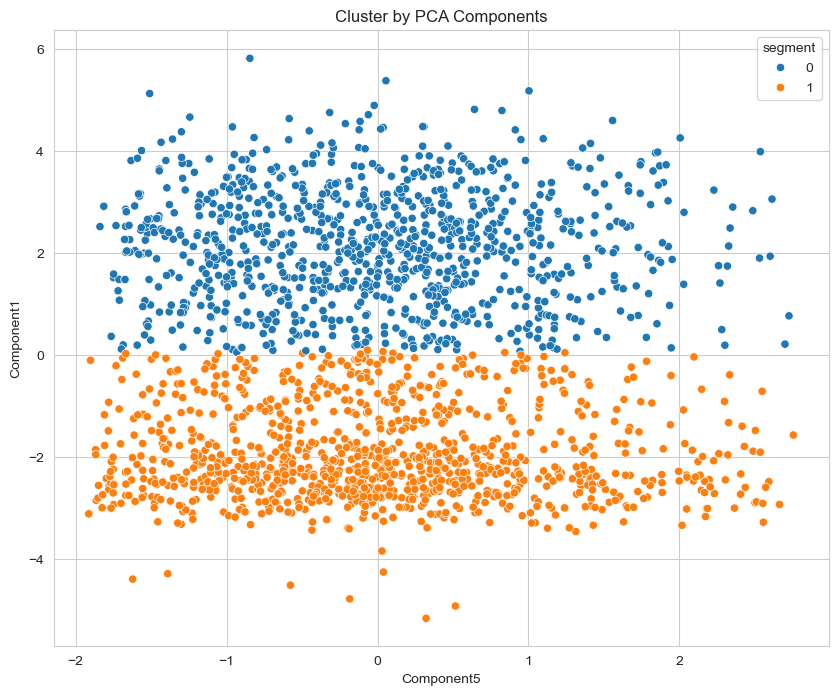

In [158]:
#Plot data by PCA Components, The Y-axis is the first Component and X-axis is the second Component
plt.figure(figsize = (10, 8))
sns.scatterplot(data = df_segm_pca_kmeans, x = 'Component5', y = 'Component1', hue = 'segment')
plt.title('Cluster by PCA Components')
plt.show()

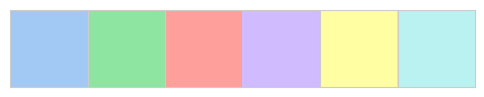

In [159]:
# set the color palette
palette = sns.color_palette(['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0'])
sns.palplot(palette) # print color palette

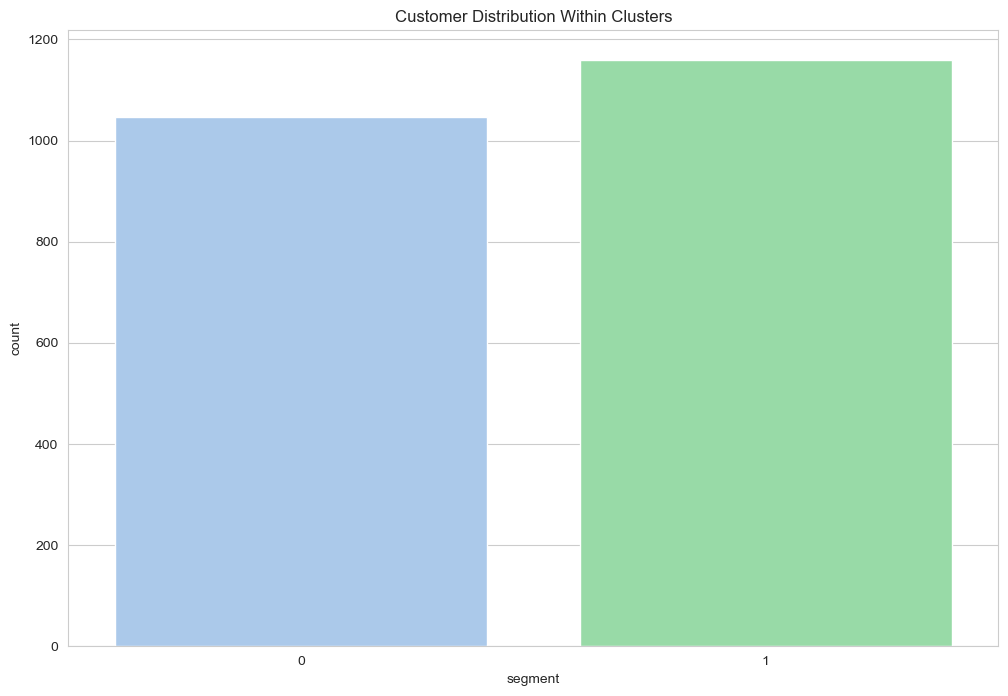

In [160]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='segment', data=new_df, palette=palette)
plt.title('Customer Distribution Within Clusters')
plt.show()

Observations 👀
1. Cluster 1 has low number of customers
2. Cluster 2 has high number of customers
3. There is not much difference in the number of customers in each clusters

Lets find out what number of customers in each cluster and their education level


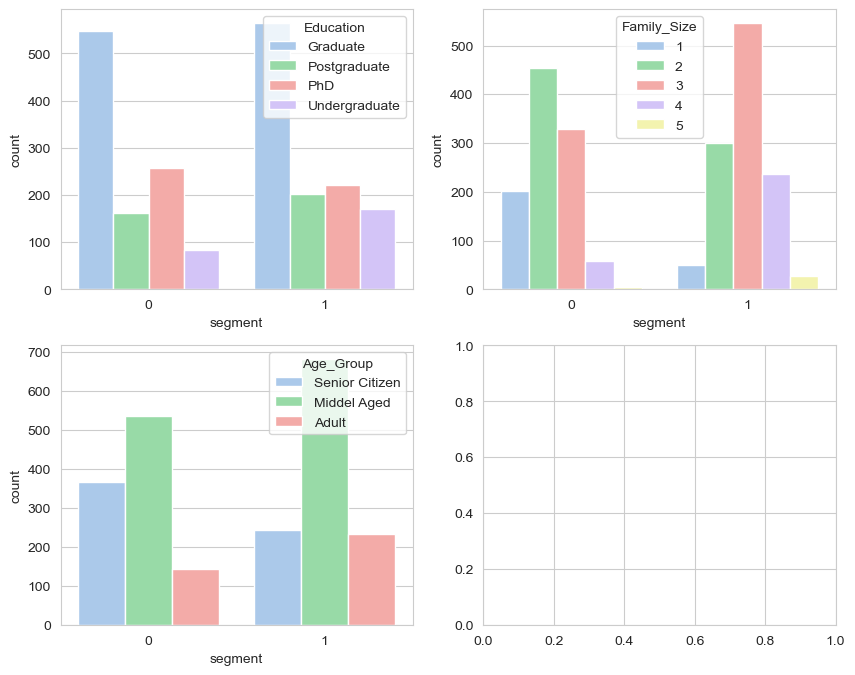

In [166]:
# create list of categories
count_cols= ['Education', 'Family_Size', 'Age_Group']

_, ax1 = plt.subplots(2,2, figsize=(10,8))

for i, col in enumerate(count_cols):
    sns.countplot(x='segment', data=new_df,ax=ax1[i//2, i%2],hue=col,palette=palette)

plt.show()

Observations 👀

1. Graduate poeple are more in first cluster comparatively
2. But second cluster have more number of P.hD and Post-Graduates

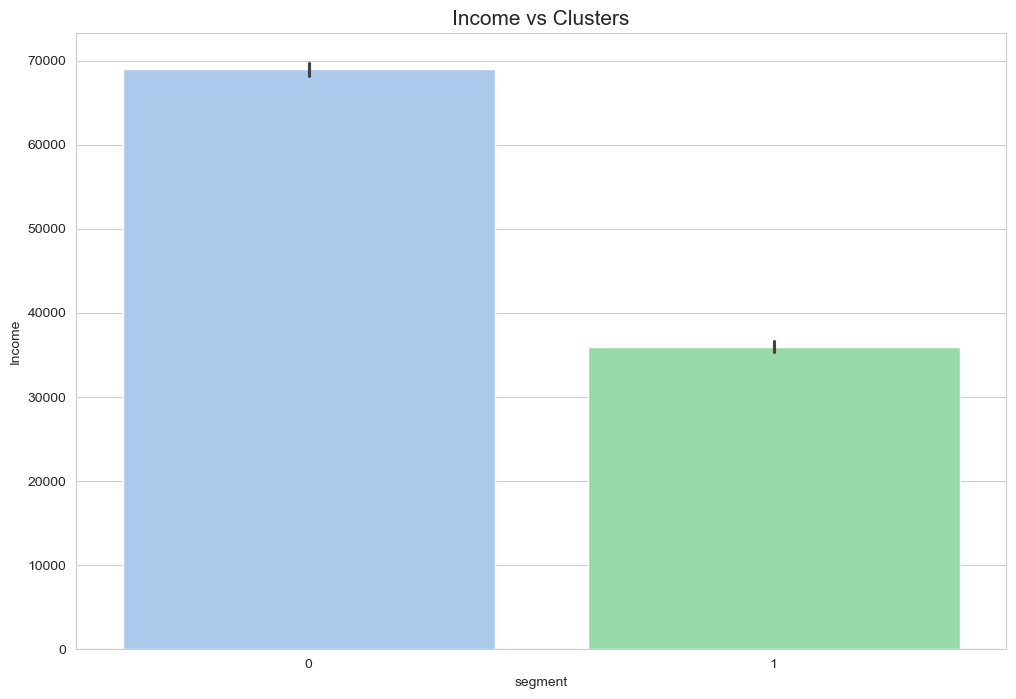

In [168]:
# Lets findout income of customers with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=new_df["segment"], y=new_df["Income"], palette=palette)
plt.title("Income vs Clusters", size=15)
plt.show()

Observations 👀

1. Cluster 0 has high income as compared to Cluster 1
2. It is quite strange to find out that though second cluster have high number of Post-Graduates, but their income level is still low as compared to cluster 1.

Following graphs shows what are the contributing factors in income

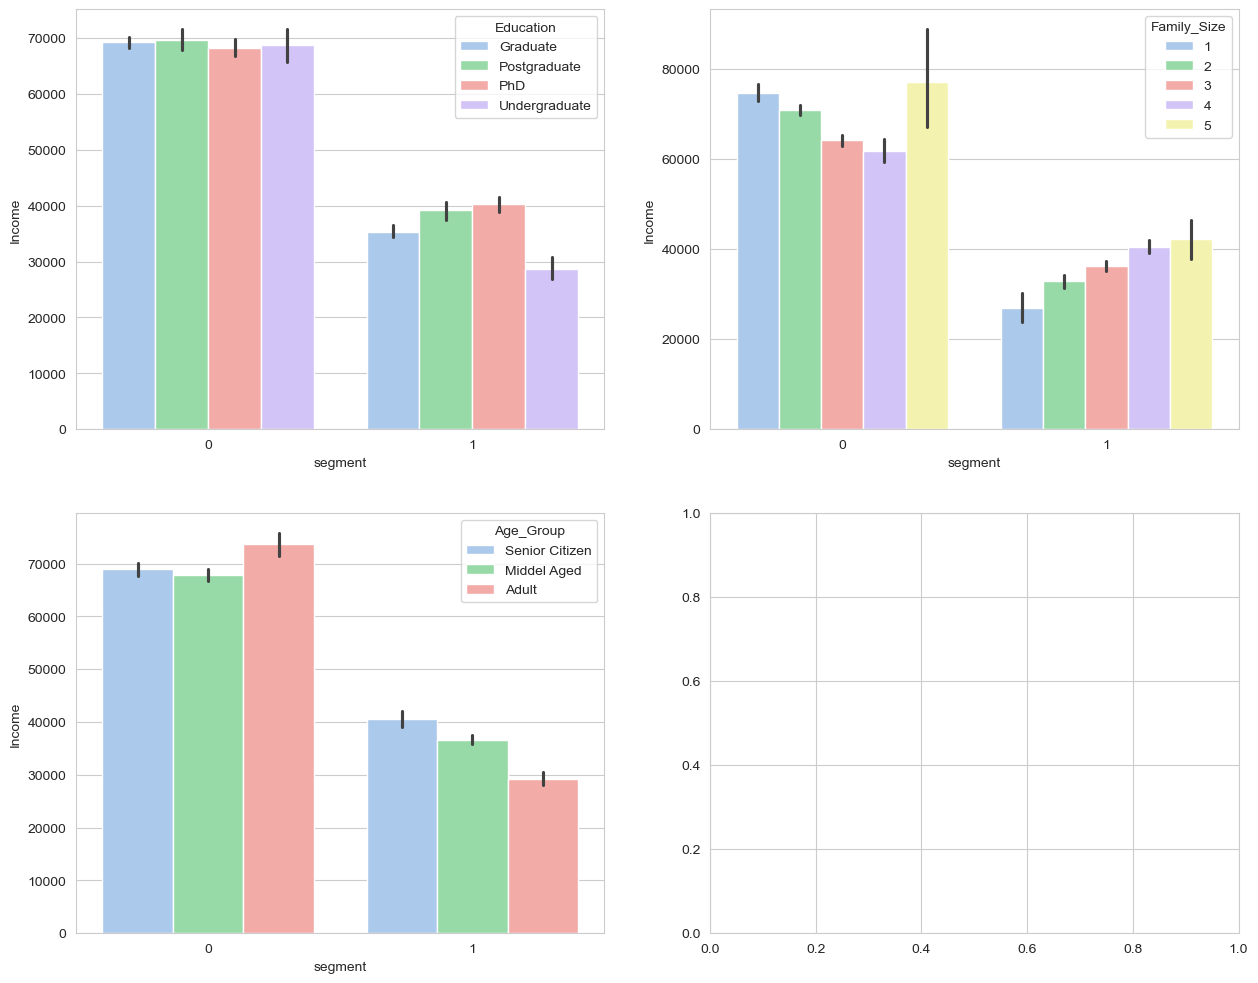

In [172]:
catcols= ['Education', 'Family_Size', 'Age_Group']

_, ax1 = plt.subplots(2,2, figsize=(15,12))

for i, col in enumerate(catcols):
    sns.barplot(x='segment', y='Income', data=new_df,ax=ax1[i//2, i%2],hue=col,palette=palette)

plt.show()

Observations 👀

1. Here we can observe that in the first cluster, Under-Graduates and Graduates are earning more than that of seconf cluster customers, therefore income level of customers of first cluster is high.

2. Also in the first cluster, customers with five family members have high income, possibly most of the members with Family size five of first cluster are earning, so they have high Income.

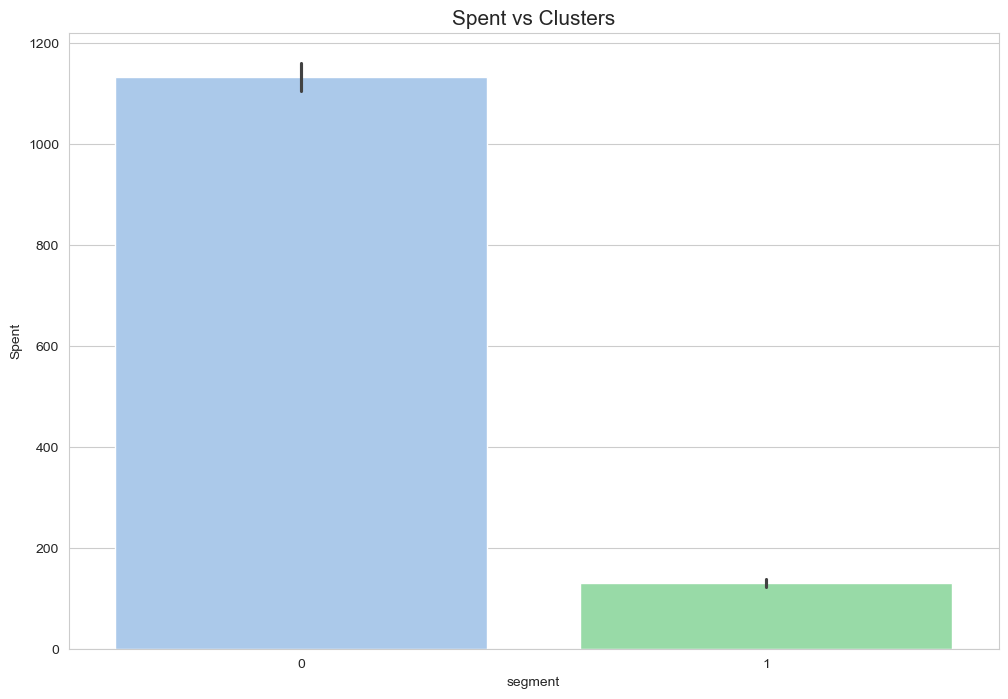

In [175]:
# Lets findout how much customers Spents with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=new_df["segment"], y=new_df["Spent"], palette=palette)
plt.title("Spent vs Clusters", size=15)
plt.show()

Observations 👀

1.As we can see, first cluster have high spending as they have high income

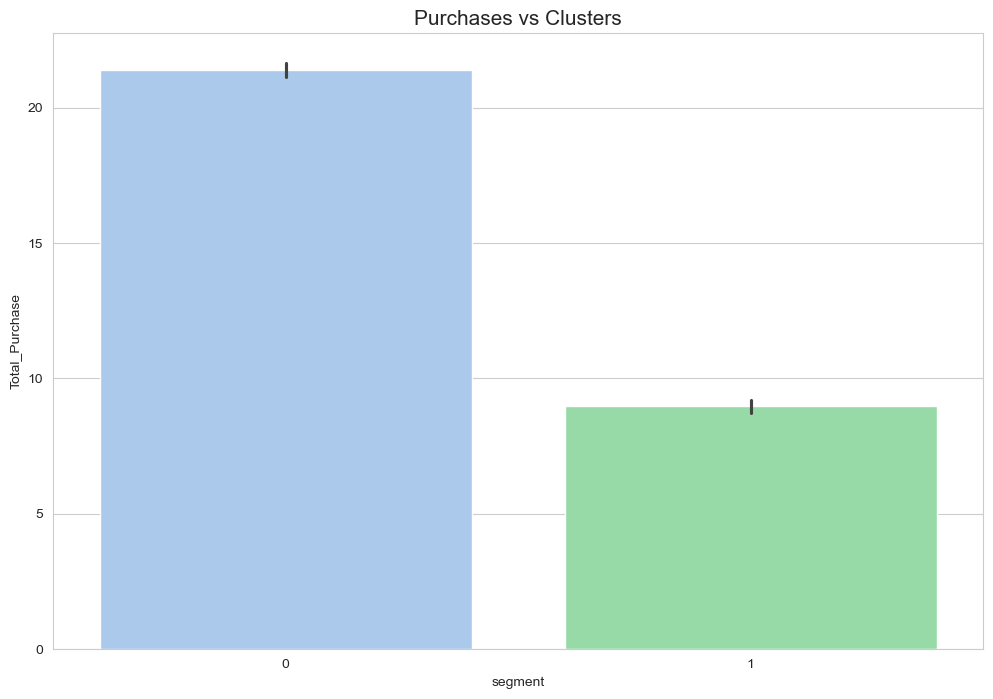

In [177]:
# Lets findout how much customers Purchase with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=new_df["segment"], y=new_df["Total_Purchase"], palette=palette)
plt.title("Purchases vs Clusters", size=15)
plt.show()

Observations 👀

1. We can see that first cluster have high purchases as compared to second cluster

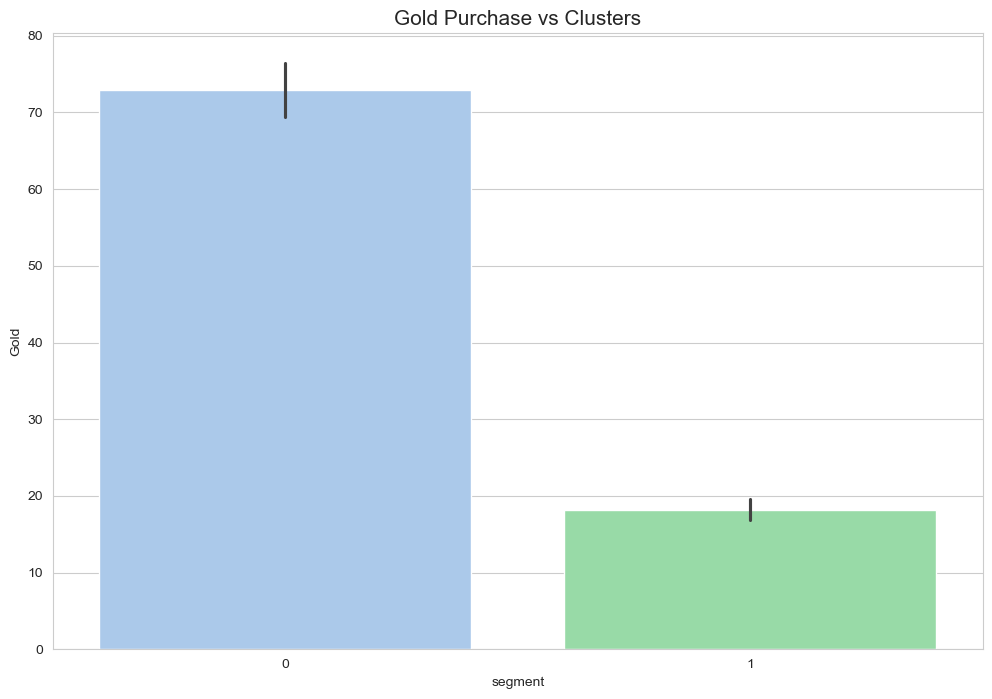

In [179]:
# Lets findout how much customers Spents on gold with in clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=new_df["segment"], y=new_df["Gold"], palette=palette)
plt.title("Gold Purchase vs Clusters", size=15)
plt.show()

Observations 👀

1. Cusomer of first cluster spent more on gold
2. we found out that cluster second have high number of poeple but have low income, so as low spending, where as cluster first customer are lower in number but have high income and high spending

In [184]:
# Importing essential libraries for bulding pipeline

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [185]:
new_df.dtypes

Education               object
Income                 float64
Recency                  int64
Gold                     int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Age_Group               object
Spent                    int64
Family_Size              int64
Total_Purchase           int64
segment                  int32
dtype: object

In [187]:
num_cols = ['Income', 'Spent', 'Total_Purchase' ]
numeric_pipeline = make_pipeline(StandardScaler())

In [189]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
ord_cols = ['Education', 'Age_Group']
ordinal_pipeline = make_pipeline(OrdinalEncoder())

In [194]:
# stack your pipelines in column transformer
transformer = ColumnTransformer(transformers=[('num',numeric_pipeline,num_cols),
                                           ('ordinal', ordinal_pipeline,ord_cols)
                                             ])

In [196]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(new_df)
print('Data has been Transformed')

Data has been Transformed


Now lets build a multi classification model that will predict the cluster for given input of particular customer

**Steps To Follow:**

1. Import required libraries
2. Separate features and target column (Clusters)
3. Create train and test data by spliting
4. Just add gradient boosting classifier to existing transformer pipeline
5. Fit data to the new pipeline

In [199]:
# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [237]:
new_df_1 = new_df.drop(columns = ['Recency',	'NumDealsPurchases',	'NumWebPurchases',	'NumCatalogPurchases',	'NumStorePurchases',	'NumWebVisitsMonth'	])

In [239]:
import os
print(os.getcwd())  # Prints the current working directory


C:\Users\batul


In [243]:
new_df_1.to_csv("new_df_1.csv", index=False)


In [245]:
# Now lets fit and transform the data
transformed = transformer.fit_transform(new_df_1)
print('Data has been Transformed')

Data has been Transformed


In [247]:
# separate features and target column
x = new_df_1.drop('segment', axis=1)
y = new_df_1['segment']

In [249]:
new_df_1

,Education,Income,Gold,Age_Group,Spent,Family_Size,Total_Purchase,segment
0,Graduate,58138.0,88,Senior Citizen,1617,1,25,0
1,Graduate,46344.0,6,Senior Citizen,27,3,6,1
2,Graduate,71613.0,42,Middel Aged,776,2,21,0
3,Graduate,26646.0,5,Adult,53,3,8,1
4,PhD,58293.0,15,Adult,422,3,19,1
...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,247,Middel Aged,1341,3,18,0
2236,PhD,64014.0,8,Senior Citizen,444,5,22,1
2237,Graduate,56981.0,24,Adult,1241,1,19,0
2238,Postgraduate,69245.0,61,Senior Citizen,843,3,23,0


In [251]:
# create train and test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [253]:
# adding GradientBoostingClassifier to transformer pipeline

final_pipeline = make_pipeline(transformer, GradientBoostingClassifier())

In [255]:
# fit the data to new pipeline & model
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Income', 'Spent',
                                                   'Total_Purchase']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'Age_Group'])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [257]:
# check the accuracy of our model
final_pipeline.score(x_test, y_test)

0.9803921568627451

In [259]:
import pickle

In [261]:
filename = 'Segment.pkl' # create a variable with name you wanna give to the file
pickle.dump(final_pipeline, open(filename,'wb'))

#K-means without PCA

In [334]:
scaled_ds

,Education,Income,Recency,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age_Group,Spent,Family_Size,Total_Purchase
0,-0.843170,0.313342,0.310412,0.846185,0.369328,1.425737,2.682770,-0.562411,0.689779,1.354136,1.679866,-1.758283,1.334711
1,-0.843170,-0.256777,-0.380715,-0.735487,-0.166574,-1.133367,-0.594869,-1.179791,-0.139383,1.354136,-0.963019,0.449700,-1.167790
2,-0.843170,0.964721,-0.795391,-0.041094,-0.702476,1.425737,-0.230687,1.289728,-0.553965,-0.158302,0.281963,-0.654291,0.807869
3,-0.843170,-1.208975,-0.795391,-0.754775,-0.166574,-0.767781,-0.959051,-0.562411,0.275198,-1.670740,-0.919802,0.449700,-0.904369
4,0.102878,0.320835,1.554440,-0.561889,1.441133,0.328978,0.133495,0.054968,-0.139383,-1.670740,-0.306453,0.449700,0.544448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,-0.843170,0.462471,-0.104264,3.913084,-0.166574,1.791323,0.133495,-0.562411,-0.139383,-0.158302,1.221101,0.449700,0.412737
2203,0.102878,0.597387,0.241299,-0.696909,2.512938,1.425737,-0.230687,-0.253722,0.689779,1.354136,-0.269885,2.657684,0.939580
2204,-0.843170,0.257413,1.450771,-0.388291,-0.702476,-0.767781,0.133495,2.215797,0.275198,-1.670740,1.054882,-1.758283,0.544448
2205,1.048926,0.850252,-1.417405,0.325390,-0.166574,0.694564,0.861859,1.289728,-0.968546,1.354136,0.393329,0.449700,1.071290


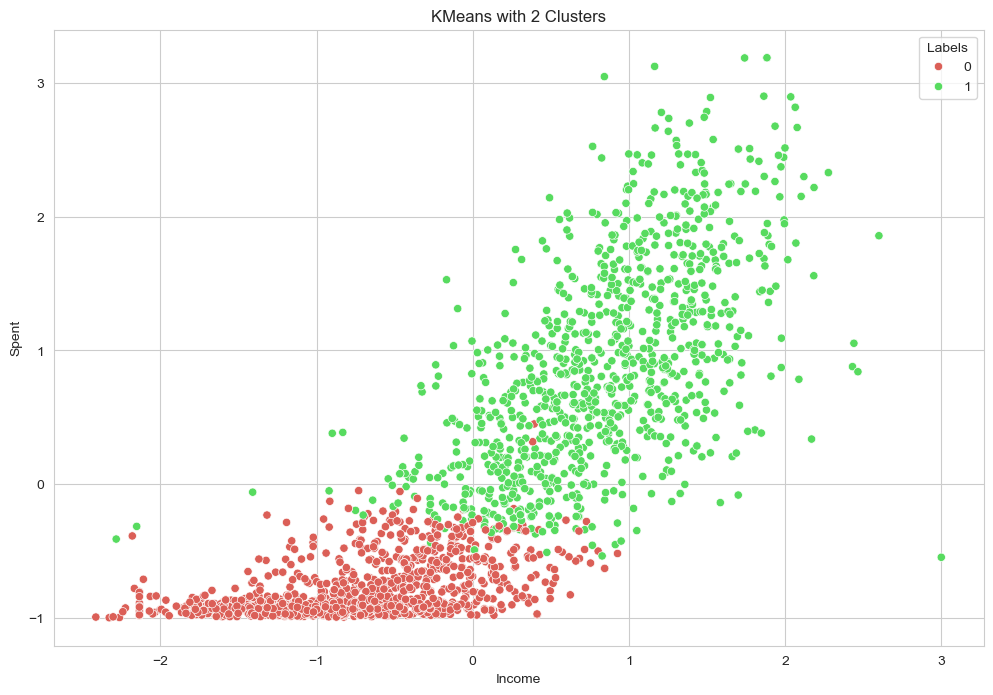

In [336]:
km2 = KMeans(n_clusters=2).fit(scaled_ds)

scaled_ds['Labels'] = km2.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Income', y ='Spent', data = scaled_ds, hue='Labels',
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 2 Clusters')
plt.show()


In [ ]:
score = silhouette_score(scaled_ds, km2.labels_, metric='cosine')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=scaled_ds, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spent', data=scaled_ds, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()


We can analyze our 5 clusters in detail now:


*   Label 1 is low income and low spending

*   Label 0 is high income and high spending




#**Hierarchical Clustering**
#Agglomerative
We will be looking at a clustering technique, which is Agglomerative Hierarchical Clustering. Agglomerative is the bottom up approach which is more popular than Divisive clustering.

We will also be using Complete Linkage as the Linkage Criteria.

The Agglomerative Clustering class will require two inputs:


*   n_clusters: The number of clusters to form as well as the number of centroids to generate.
*   linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.




Value will be: 'complete'


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglom = AgglomerativeClustering(n_clusters=2, linkage='average').fit(scaled_ds)

scaled_ds['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Income', y ='Spent', hue='Labels', data = scaled_ds,
                palette=sns.color_palette('hls', 2))
plt.title('Agglomerative with 2 Clusters')
plt.show()

Dendrogram Associated for the Agglomerative Hierarchical Clustering

Remember that a distance matrix contains the distance from each point to every other point of a dataset .

We can use the function distance_matrix, which requires two inputs. Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct.

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

dist = distance_matrix(scaled_ds, scaled_ds)
print(dist)

Using the linkage class from hierarchy, pass in the parameters:

The distance matrix

'complete' for complete linkage

In [ ]:
Z = hierarchy.linkage(dist, 'complete')

A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering.

In [ ]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

In [ ]:
#We used complete linkage for our case, let's change it to average linkage to see how the dendogram changes.

In [ ]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [ ]:
score = silhouette_score(scaled_ds, agglom.labels_, metric="euclidean")
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

#Density Based Clustering (DBSCAN)
Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

In this part, the main focus will be manipulating the data and properties of DBSCAN and observing the resulting clustering.

#Modeling
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise.

This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points

Epsilon determine a specified radius that if includes enough number of points within, we call it dense area

minimumSamples determine the minimum number of data points we want in a neighborhood to define a cluster.


#Selecting MinPts
MinPts determines the minimum number of points required to form a dense region. Here are some guidelines:

1. General rule: A good starting point is to set MinPts = 2 * num_features, where num_features is the number of dimensions in your dataset.

2. Noise consideration: If your data has noise or you want to detect smaller clusters, you might want to decrease MinPts.

3. Dataset size: For larger datasets, you might need to increase MinPts to avoid creating too many small clusters.

Remember, the choice of parameters can significantly affect the results. It's often beneficial to experiment with different values and evaluate the resulting clusters to find the best fit for your specific dataset and problem.


#Selecting ε (Epsilon)
The ε parameter determines the maximum distance between two points for them to be considered neighbors. To choose an appropriate ε:

1. Use domain knowledge: If you have insight into what distance is meaningful for your specific problem, use that as a starting point.

2. K-distance graph: This is a more systematic approach:

Calculate the distance to the k-th nearest neighbor for each point (where k = MinPts).
Plot these k-distances in ascending order.
Look for an "elbow" in the graph – a point where the curve starts to level off.
The ε value at this elbow is often a good choice.

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=24)
neighbors_fit = neighbors.fit(scaled_ds)
distances, indices = neighbors_fit.kneighbors(scaled_ds)

In [ ]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=4, min_samples=24).fit(scaled_ds)

scaled_ds['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Income', y ='Spent', hue='Labels', data = scaled_ds,
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 2, min samples 24')
plt.show()

In [ ]:
score = silhouette_score(scaled_ds, db.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

#Mean Shift Algorithm
MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Estimate the bandwidth
bandwidth = estimate_bandwidth(scaled_ds, quantile=0.12, n_samples=500)

# Initialize the Mean-Shift algorithm
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Train the model
ms.fit(scaled_ds)

# Visualize the results
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

# Plot the data points and the centroids
plt.figure(figsize=(7.5, 3.5))
plt.scatter(scaled_ds['Income'], scaled_ds['Spent'], c=labels, cmap='summer')
plt.scatter(cluster_centers[:,1], cluster_centers[:,9], marker='*',
s=20, c='r')
plt.show()

In [ ]:
scaled_ds.columns

In [ ]:
score = silhouette_score(scaled_ds, ms.labels_, metric='cosine')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

#**Gaussian Mixture Model (GMM)**

This model assumes that clusters in Python can be modeled using a Gaussian distribution. Gaussian distributions, informally known as bell curves, are functions that describe many important things like population heights and weights.

These models are useful because Gaussian distributions have well-defined properties such as the mean, variance and covariance. The mean is just the average value of an input within a cluster. Variance measures the fluctuation in values for a single input. The covariance is a matrix of statistics describing how inputs are related to each other and, specifically, how they vary together.

Collectively, these parameters allow the GMM algorithm to create flexible identity clusters of complex shapes. Whereas K-means typically identifies spherically shaped clusters, GMM can more generally identify Python clusters of different shapes. This makes GMM more robust than K-means in practice.

In [ ]:
from sklearn.mixture import GaussianMixture

let’s initialize an instance of the GaussianMixture class. Let’s start by considering three Python clusters and fit the model to our inputs

In [ ]:
from sklearn.mixture import GaussianMixture
n_clusters = 2
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(scaled_ds)

Now, let’s generate the cluster labels and store the results, along with our inputs, in a new data frame:

In [ ]:
cluster_labels = gmm_model.predict(scaled_ds)
X = pd.DataFrame(scaled_ds)
X['cluster'] = cluster_labels

Next, let’s plot each cluster

In [ ]:
sns.scatterplot(x = 'Income', y ='Spent', hue='Labels', data = X,
                palette=sns.color_palette('hls', 2))

In [ ]:
score = silhouette_score(X, cluster_labels, metric='cosine')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)